In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn

## Import all the things, then read all the things

In [123]:
respondent = pd.read_csv('data/atusresp_2014.dat')
respondent.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20140101140007,1,2014,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,-1,0,0,-1
1,20140101140011,1,2014,1,-1,-1,-1,500,-1,1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
2,20140101140028,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
3,20140101140063,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20140101140168,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,-1,0,0,-1


In [124]:
roster = pd.read_csv('data/atusrost_2014.dat')
roster.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20140101140007,1,20,19,2,0,0,0
1,20140101140007,2,19,21,1,0,0,0
2,20140101140007,3,0,22,1,0,0,0
3,20140101140011,1,16,18,2,0,0,0
4,20140101140011,2,33,24,2,0,0,0


In [125]:
activity = pd.read_csv('data/atusact_2014.dat')
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,...,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,...,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,...,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,...,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,...,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [126]:
who = pd.read_csv('data/atuswho_2014.dat')
who.head()

,TUCASEID,TUACTIVITY_N,TRWHONA,TULINENO,TUWHO_CODE
0,20140101140007,1,1,-1,-1
1,20140101140007,2,0,3,22
2,20140101140007,3,1,-1,-1
3,20140101140007,4,0,2,21
4,20140101140007,4,0,3,22


In [127]:
eldercare = pd.read_csv('data/atusrostec_2014.dat')
eldercare.head(2)

,TUCASEID,TEAGE_EC,TEELDUR,TEELWHO,TEELYRS,TRELHH,TUECLNO,TULINENO,TXAGE_EC,TXELDUR,TXELWHO,TXELYRS
0,20140101140168,77,2,48,-1,0,3,-1,0,0,0,-1
1,20140101140559,73,4,47,10,0,4,-1,0,0,0,0


In [128]:
activity_summary = pd.read_csv('data/atussum_2014.dat')
activity_summary.head(2)

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4.891316e+06,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,2.314737e+07,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


# All read in. Dropping weight from summary and renaming ID to match other files.

In [129]:
activity_summary.drop(activity_summary.columns[1], axis=1, inplace=True)
activity_summary = activity_summary.rename(columns={'tucaseid': 'TUCASEID'})

# Getting mind, body, spirit list by 1) get fields to use, group by M/B/S and make a new frame with sum for each

In [130]:
def get_mbs_activities(i):
    col_names = []
    col_names.append('TUCASEID')
    col_names.append('TRCHILDNUM')
    col_names.append('TEAGE')
    col_names.append('TESEX')
    col_names.append('PEEDUCA')
    col_names.append('PTDTRACE')
    for x in i.columns:
        if x.startswith(('t0102', 't0103', 't1301', 't06', 't120301', 't120312', 't120313', 't120401', 't120102', 't14', 't15', 't120304')):
            col_names.append(x)
    return col_names

In [131]:
col_names = get_mbs_activities(activity_summary)
col_names.remove('t130103')
col_names.remove('t130104')

In [132]:
get_body = [x for x in col_names if x.startswith(('t0102', 't0103', 't1301'))]

In [133]:
get_mind = [x for x in col_names if x.startswith(('t06', 't120301', 't120312', 't120313', 't120401', 't120102'))]

In [134]:
get_spirit = [x for x in col_names if x.startswith(('t14', 't15', 't120304'))]

In [135]:
mind_body_spirit = activity_summary[col_names].copy()
mind_body_spirit.head()

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,PTDTRACE,t010201,t010299,t010301,t010399,...,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999
0,20140101140007,1,20,2,39,1,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,1,16,2,37,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,3,65,2,38,1,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,0,50,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1,23,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
mind_body_spirit['BODY'] = mind_body_spirit[get_body].sum(axis=1)

In [137]:
mind_body_spirit['MIND'] = mind_body_spirit[get_mind].sum(axis=1)

In [138]:
mind_body_spirit['SPIRIT'] = mind_body_spirit[get_spirit].sum(axis=1)

In [139]:
mind_body_spirit.head()

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,PTDTRACE,t010201,t010299,t010301,t010399,...,t150402,t150499,t150501,t150601,t150602,t150701,t159999,BODY,MIND,SPIRIT
0,20140101140007,1,20,2,39,1,60,0,0,0,...,0,0,0,0,0,0,0,150,0,0
1,20140101140011,1,16,2,37,2,60,0,0,0,...,0,0,0,0,0,0,0,60,0,0
2,20140101140028,3,65,2,38,1,90,0,0,0,...,0,0,0,0,0,0,0,90,120,0
3,20140101140063,0,50,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,60,350,110
4,20140101140168,1,23,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,60,0,0


In [140]:
mind_body_spirit = mind_body_spirit.drop(mind_body_spirit.columns[5:-3], axis=1)

In [141]:
mind_body_spirit.head(5)

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,BODY,MIND,SPIRIT
0,20140101140007,1,20,2,39,150,0,0
1,20140101140011,1,16,2,37,60,0,0
2,20140101140028,3,65,2,38,90,120,0
3,20140101140063,0,50,2,39,60,350,110
4,20140101140168,1,23,2,39,60,0,0


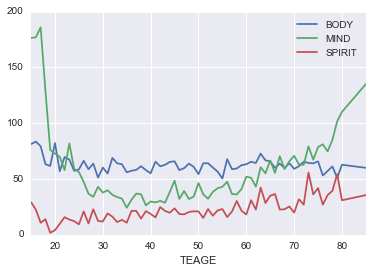

In [142]:
balance_by_age = mind_body_spirit.groupby('TEAGE').mean()
balance_by_age.drop(balance_by_age.columns[0:4], axis=1, inplace=True)
balance_by_age.plot()

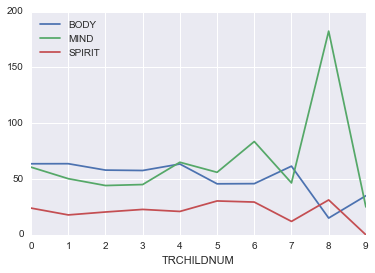

In [143]:
balance_by_children = mind_body_spirit.groupby('TRCHILDNUM').mean()
balance_by_children.drop(balance_by_children.columns[0:4], axis=1, inplace=True)
balance_by_children.plot()

## Need a radar plot to really show the difference between sexes

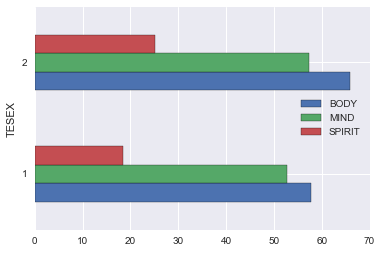

In [144]:
balance_by_sex = mind_body_spirit.groupby('TESEX').mean()
balance_by_sex.drop(balance_by_sex.columns[0:4], axis=1, inplace=True)
balance_by_sex.plot(kind='barh')

## Need to rename X axis and/or find radar plots

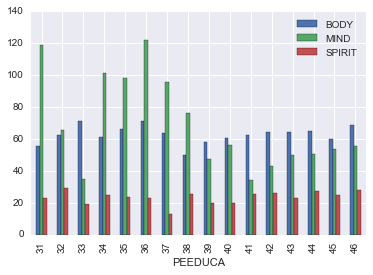

In [146]:
balance_by_edu = mind_body_spirit.groupby('PEEDUCA').mean()
balance_by_edu.drop(balance_by_edu.columns[0:4], axis=1, inplace=True)
balance_by_edu.plot(kind='bar')